Sería curioso hacer un Random Forest con cada año como una clase

Modelos a aplicar:
- Regresión lineal
- Regresion polinomica???
- Elastic-Net, Lasso o Ridge? He probado Elastic-Net y no mejora nada. No lo incluyo no??
- KNN
- Random Forrest para Regresion. Investigar Regression-Enhanced Random Forests
- SVM Regressor
- Red de neuronas mínima
- Deep learning con dropout

**TO DO:**
- Investigar recomendaciones, pautas y estrategias para un correcto preprocesamiento de un dataset
- Investigar todas los modelos de regresión y diferentes aproximaciones que se pueden realizar
- Decisión de todos los algoritmos vamos a aplicar
- Hacer árbol de decisión para registrar todas las posibles pruebas a realizar
- Investigar Power BI y Redes Neurales + Deep Learning

**Ideas**
- Sería una buena alternativa, contruir una red de neuronas con regularización dropout para que sea capaz de calcular la salida sin ciertos datos de entrada, puediendo así soportar los valores vacíos.
- Estaría chulo probar a hacer un RandomForrest con clases como cada año o grupo de X años y despues meterselo a un regresor como otra feature a ver si mejora mucho.

**Planificación Calendario**
* 27/03 - 18/04 (3 Semanas) -> Análisis y preprocesamiento
* 18/04 - 23/05 (5 Semanas) -> Modelos
* 23/05 - 13/06 (3 Semanas) -> Análisis de resultados
* 13/06 - 20/06 (1 Semana) -> Finiquitar memoria
* 20/06 ENTREGA DEL TFG
* 20/06 - 30/06 (1-2 semanas) -> Preparar presentación
* 30/06 PRESENTACIÓN TFG

**Problemas**
- Al dehacer la trnasformación Yeo-Johnson, para valores menores a -2.7 devuelve un NaN.

# Importar Liberías

In [96]:
import pandas as pd
import numpy as np
import sklearn 
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

# Importar dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/PreprocessedDataset.csv', sep=',')

# Separación de la variable objetivo

In [3]:
X = df.drop(columns=['Life Expectancy'])
y = df['Life Expectancy']

# División en conjunto de entrenamiento y de test

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Modelos

## Regresión Lineal

In [71]:
#Función para deshacer la estandarización y Yeo-Johnson en la variable objetivo
df_filled = pd.read_csv('https://raw.githubusercontent.com/MiguelRocaGarcia/DatasetTFG/master/FilledDataset.csv',sep=',')
powerInv = PowerTransformer(method='yeo-johnson',standardize=True)
powerInv.fit(df_filled['Life Expectancy'].values.reshape(-1,1))

PowerTransformer()

In [73]:
#Entrenamiento
linear = LinearRegression()
linear.fit(X_train, y_train) 

LinearRegression()

In [74]:
#Predicción en train
trainPrediction =  linear.predict(X_train)

In [75]:
#Predicción en test
linearPredictions = pd.DataFrame()
linearPredictions['Prediction Standarized'] = linear.predict(X_test)
linearPredictions['Real Value Standarized'] = y_test.values
linearPredictions['Prediction'] = powerInv.inverse_transform(linearPredictions['Prediction Standarized'].values.reshape(-1,1))
linearPredictions['Real Value'] = powerInv.inverse_transform(y_test.values.reshape(-1,1))

In [76]:
linearPredictions[linearPredictions['Prediction'].isna()]

,Prediction Standarized,Real Value Standarized,Prediction,Real Value
1958,-2.901169,-2.467513,NaN,27.8


In [77]:
powerInv.inverse_transform(np.array([-4,-3,-2.7,-2.5,-2,-1,0,1,2,3]).reshape(-1,1))

array([[        nan],
       [        nan],
       [        nan],
       [26.07386062],
       [42.72305766],
       [58.94741026],
       [69.47164557],
       [77.63139671],
       [84.43273049],
       [90.33301839]])

In [78]:
#Error de entrenamiento y de test según diferentes métricas de medida:
#Hay que tener en cuenta en los errores de absolute value que se ha quitado algunas fila por ser NaN
print("Regresión Lineal:")

print("\nRMSE Train standarized values: ", str(mean_squared_error(y_train, trainPrediction, squared = False)))
print("RMSE Test standarized values: ", str(mean_squared_error(y_test, linearPredictions['Prediction Standarized'], squared = False)))
print("RMSE Test absolute values: ", str(mean_squared_error(linearPredictions[linearPredictions['Prediction'].notna()]['Real Value'], linearPredictions[linearPredictions['Prediction'].notna()]['Prediction'], squared = False)))

print("\nMAE Train standarized values: ", str(mean_absolute_error(y_train, trainPrediction)))
print("MAE Test standarized values: ", str(mean_absolute_error(y_test, linearPredictions['Prediction Standarized'])))
print("MAE Test absolute values: ", str(mean_absolute_error(linearPredictions[linearPredictions['Prediction'].notna()]['Real Value'], linearPredictions[linearPredictions['Prediction'].notna()]['Prediction'])))

print("\nR2 Train: ", str(r2_score(y_train, trainPrediction)))
print("R2 Test: ", str(r2_score(y_test, linearPredictions['Prediction Standarized'])))

Regresión Lineal:

RMSE Train standarized values:  0.19528517568460563
RMSE Test standarized values:  0.20070399942475228
RMSE Test absolute values:  2.1139550419065474

MAE Train standarized values:  0.13749569775022136
MAE Test standarized values:  0.14029030579753546
MAE Test absolute values:  1.4239772722193462

R2 Train:  0.9620911516203497
R2 Test:  0.9587236562999787


In [80]:
#NO ENTIENDO ESTO. POR QUÉ DA TANTO ERROR PERO CUANDO HAGO CON TEST NO?
#Validación Cruzada de Regresión Lineal
linear = LinearRegression()
linear.fit(X, y) 

score_RMSE = cross_val_score(linear, X, y, cv=5, scoring= 'neg_root_mean_squared_error')                     
score_MAE = cross_val_score(linear, X, y, cv=5, scoring= 'neg_mean_absolute_error')
score_R2 = cross_val_score(linear, X, y, cv=5, scoring= 'r2')
scores_max_error = cross_val_score(linear, X, y, cv=5, scoring='max_error')

print("Validación de RMSE de Regresión lineal: ", score_RMSE, "\nMedia: ", score_RMSE.mean())
print("\nValidación de MAE de Regresión lineal: ", score_MAE, "\nMedia: ", score_MAE.mean())
print("\nValidación de R2 de Regresión lineal: ", score_R2, "\nMedia: ", score_R2.mean())
print("\nMáximo error de Regresión lineal: ", scores_max_error, "\nMedia: ", scores_max_error.mean())

Validación de RMSE de Regresión lineal:  [-0.17813553 -0.30130906 -0.24239742 -0.252925   -0.36050878] 
Media:  -0.2670551569583631

Validación de MAE de Regresión lineal:  [-0.13875265 -0.1920728  -0.16114356 -0.1720119  -0.26658552] 
Media:  -0.18611328465615445

Validación de R2 de Regresión lineal:  [0.96921579 0.91097101 0.93874863 0.93113806 0.87393615] 
Media:  0.9248019280847931

Máximo error de Regresión lineal:  [-0.78570433 -1.5084018  -1.89131461 -1.64132046 -1.34017251] 
Media:  -1.4333827410368425


<AxesSubplot:xlabel='Real Value Standarized', ylabel='Density'>

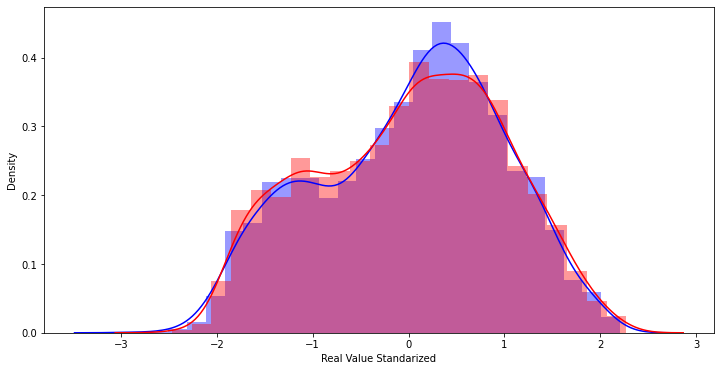

In [85]:
#Mostrar distribución de la varibale objetivo real y calculada
plt.figure(figsize=(12,6))
sns.distplot(linearPredictions['Prediction Standarized'], color='b')
sns.distplot(linearPredictions['Real Value Standarized'], color='r')

# KNN

In [97]:
#GridSearch de la regresión KNN para optimizar RMSE
grid_KNN_RMSE = GridSearchCV(
    KNeighborsRegressor(),
    {'n_neighbors': (2,5,10,25,50),
     'weights': ('uniform', 'distance')},
     scoring='neg_root_mean_squared_error',                              
     cv=5,
     n_jobs=-1,
     return_train_score = True
)
grid_KNN_RMSE.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': (2, 5, 10, 25, 50),
                         'weights': ('uniform', 'distance')},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [98]:
resultados = pd.DataFrame(grid_KNN_RMSE.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)

,param_n_neighbors,param_weights,mean_test_score,std_test_score,mean_train_score,std_train_score
1,2,distance,-0.102050,0.005300,NaN,NaN
3,5,distance,-0.107589,0.004052,-1.728391e-08,3.598510e-10
0,2,uniform,-0.108602,0.005754,NaN,NaN
2,5,uniform,-0.124175,0.004587,NaN,NaN
5,10,distance,-0.130435,0.004264,-4.089657e-08,2.975364e-10
4,10,uniform,-0.159230,0.005546,-1.378202e-01,7.291793e-04
7,25,distance,-0.176803,0.005923,-1.122058e-07,1.555894e-09
9,50,distance,-0.215650,0.005831,-2.227224e-07,2.805313e-09
6,25,uniform,-0.218187,0.007464,-2.065676e-01,1.260045e-03
8,50,uniform,-0.263629,0.006908,-2.567883e-01,1.075339e-03


In [ ]:
grid_KNN_RMSE = GridSearchCV(
    KNeighborsRegressor(),
    {'n_neighbors': (2,5,10,25,50),
     'weights': ('uniform', 'distance')},
     scoring='neg_root_mean_squared_error',                              
     cv=5,
     n_jobs=-1,
     return_train_score = True
)
grid_KNN_RMSE.fit(X_train, y_train)